# Melbourne Data

In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
# Read in Melbourne Data Source CSV
melbourne_df = pd.read_csv('Resources/melbourne_data.csv', delimiter=", ")
melbourne_df.head()

/Users/kathrynrigsby/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,date,pm25,pm10,o3,no2,so2,co
0,2020/7/2,24,NaN,NaN,NaN,",",NaN
1,2020/7/3,20,NaN,NaN,NaN,",",NaN
2,2020/7/4,20,NaN,NaN,NaN,",",NaN
3,2020/7/5,24,NaN,NaN,NaN,",",NaN
4,2020/7/6,18,NaN,NaN,NaN,",",NaN


In [3]:
# Dropping columns not using
dropped_melbourne_df = melbourne_df.drop(["pm10","o3","no2","so2","co"],axis=1)
dropped_melbourne_df.head()

,date,pm25
0,2020/7/2,24
1,2020/7/3,20
2,2020/7/4,20
3,2020/7/5,24
4,2020/7/6,18


In [4]:
# Changing datatype from object to datetime
dropped_melbourne_df["date"] = pd.to_datetime(dropped_melbourne_df["date"])

In [5]:
# Dropping any data before 2017
droppedB4_17 = dropped_melbourne_df.loc[(dropped_melbourne_df["date"]>"2016-12-31")].dropna(how='any',axis=1)

### 2017 Data

In [6]:
# Drop everything that is not January - July 2017
melbourne_data_17 = droppedB4_17.loc[(droppedB4_17["date"]<"2017-07-25")].dropna(how='any')

In [7]:
# Create an empty list for AQI column
melbourne_data_17["AQI"]=""

In [8]:
# Calculates AQI and stores in list
AQI2017 = []
for value in melbourne_data_17["pm25"]:
    if value >= 0 and value <= 12:
        AQI2017.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI2017.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI2017.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI2017.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI2017.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI2017.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2017.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
          AQI2017.append("invalid")
AQI2017 = [round(i,1) for i in AQI2017]

In [9]:
# Add the AQI values to the new AQI column
melbourne_data_17["AQI"] = AQI2017
melbourne_data_17.head()

,date,pm25,AQI
998,2017-07-02,57,151.8
999,2017-07-03,33,95.0
1000,2017-07-04,29,86.5
1001,2017-07-05,13,52.9
1002,2017-07-06,18,63.4


In [10]:
# Create bins and labels
bins = [0,50,100,150,200,300,500]
quality = ["Good","Moderate","Unhealthy for Sensitive Groups","Unhealthy","Very Unhealthy","Hazardous"]

In [11]:
# Use bins to create a column for AQI quality
melbourne_data_17["Levels of Concern"] = pd.cut(melbourne_data_17["AQI"],bins,labels=quality,include_lowest=True)
melbourne_data_17

,date,pm25,AQI,Levels of Concern
998,2017-07-02,57,151.8,Unhealthy
999,2017-07-03,33,95.0,Moderate
1000,2017-07-04,29,86.5,Moderate
1001,2017-07-05,13,52.9,Moderate
1002,2017-07-06,18,63.4,Moderate
...,...,...,...,...
1125,2017-06-27,19,65.5,Moderate
1126,2017-06-28,46,126.9,Unhealthy for Sensitive Groups
1127,2017-06-29,35,99.2,Moderate
1128,2017-06-30,29,86.5,Moderate


In [12]:
# Export sorted csv to output data
# Used as a check point for valid data
melbourne_data_17.sort_values(by=["date"]).to_csv("output_data/melbourne_data_17.csv")

In [13]:
# Groupby and aggregrate Max,Min
calculate_17 = melbourne_data_17.groupby(melbourne_data_17["date"].dt.strftime('%m'))
mean_df =calculate_17[["pm25","AQI"]].mean().reset_index(drop=False,inplace=False)
max_df = calculate_17[["pm25","AQI"]].max()
min_df = calculate_17[["pm25","AQI"]].min()

In [14]:
# Merge mean_df, max_df
result = pd.merge(mean_df,max_df, how='outer', on=['date'],suffixes=("_avg","_max"))

In [15]:
# Merge result, min_df
result2 = pd.merge(result,min_df, how='outer',on=['date'])

In [16]:
# Rename columns
melbourne_2017_month_df = result2.rename(columns={
                                    
                                    "date":"Month",
                                    "pm25_avg":"Avg pm2.5",
                                    "AQI_avg":"Avg AQI",
                                    "pm25_max":"Max pm2.5",
                                    "AQI_max":"Max AQI",
                                    "pm25":"Min pm2.5",
                                    "AQI":"Min AQI"
                                    
 })
melbourne_2017_month_df

,Month,Avg pm2.5,Avg AQI,Max pm2.5,Max AQI,Min pm2.5,Min AQI
0,05,40.250000,107.400000,76,161.6,14,55.0
1,06,44.344828,118.355172,82,164.7,18,63.4
2,07,26.125000,80.933333,57,151.8,9,37.5


In [17]:
# Drop columns no longer going to use
melbourne_2017_df = melbourne_2017_month_df.drop(['Avg pm2.5', 'Max pm2.5','Max AQI','Min pm2.5','Min AQI'], axis=1)

### 2018 Data

In [18]:
# Dropping anything that is not January - July 2018
melbourne_data_18 = droppedB4_17.loc[(droppedB4_17["date"]>"2017-12-31")&(droppedB4_17["date"]<"2018-07-25")].dropna(how='any')

In [19]:
# Create an empty list for AQI column
melbourne_data_18["AQI"]=""

In [20]:
# Calculates AQI and stores in list
AQI2018 = []
for value in melbourne_data_18["pm25"]:
    if value >= 0 and value <= 12:
        AQI2018.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI2018.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI2018.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI2018.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI2018.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI2018.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2018.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI2018.append("invalid")
AQI2018 = [round(i,1) for i in AQI2018]

In [21]:
# Add the AQI values to the new AQI column
melbourne_data_18["AQI"] = AQI2018
melbourne_data_18.head()

,date,pm25,AQI
643,2018-07-02,33,95.0
644,2018-07-03,55,149.0
645,2018-07-04,29,86.5
646,2018-07-05,22,71.8
647,2018-07-06,19,65.5


In [22]:
# Create bins and labels 
bins = [0,50,100,150,200,300,500]
quality = ["Good","Moderate","Unhealthy for Sensitive Groups","Unhealthy","Very Unhealthy","Hazardous"]

In [23]:
# Use bins and labels to create AQI quality
melbourne_data_18["Levels of Concern"] = pd.cut(melbourne_data_18["AQI"],bins,labels=quality,include_lowest=True)
melbourne_data_18

,date,pm25,AQI,Levels of Concern
643,2018-07-02,33,95.0,Moderate
644,2018-07-03,55,149.0,Unhealthy for Sensitive Groups
645,2018-07-04,29,86.5,Moderate
646,2018-07-05,22,71.8,Moderate
647,2018-07-06,19,65.5,Moderate
...,...,...,...,...
904,2018-03-28,28,84.4,Moderate
905,2018-03-29,28,84.4,Moderate
906,2018-03-30,30,88.6,Moderate
907,2018-03-31,32,92.8,Moderate


In [24]:
# Export Melbourne 2018 data to csv
melbourne_data_18.sort_values(by=["date"]).to_csv("output_data/melbourne_data_18.csv")

In [25]:
# Groupby and aggregrate Max,Min
calculate_18 = melbourne_data_18.groupby(melbourne_data_18["date"].dt.strftime('%m'))
mean_df =calculate_18[["pm25","AQI"]].mean().reset_index(drop=False,inplace=False)
max_df = calculate_18[["pm25","AQI"]].max()
min_df = calculate_18[["pm25","AQI"]].min()




In [26]:
# Merge mean_df,max_df
result = pd.merge(mean_df,max_df, how='outer', on=['date'],suffixes=("_avg","_max"))

In [27]:
# Merge result,min_df
result2 = pd.merge(result,min_df, how='outer',on=['date'])

In [28]:
# Rename columns
melbourne_2018_month_df = result2.rename(columns={
                                    
                                    "date":"Month",
                                    "pm25_avg":"Avg pm2.5",
                                    "AQI_avg":"Avg AQI",
                                    "pm25_max":"Max pm2.5",
                                    "AQI_max":"Max AQI",
                                    "pm25":"Min pm2.5",
                                    "AQI":"Min AQI"
                                    
 })
melbourne_2018_month_df

,Month,Avg pm2.5,Avg AQI,Max pm2.5,Max AQI,Min pm2.5,Min AQI
0,01,38.300000,107.273333,65,155.9,21,69.7
1,02,33.076923,95.919231,64,155.4,18,63.4
2,03,30.516129,90.241935,49,134.2,18,63.4
3,04,44.866667,114.256667,113,180.7,18,63.4
4,05,38.100000,104.746667,83,165.2,21,69.7
5,06,42.900000,112.986667,104,176.0,14,55.0
6,07,28.956522,86.073913,67,156.9,9,37.5


In [29]:
# Dropping columns no longer using
melbourne_2018_df = melbourne_2018_month_df.drop(['Avg pm2.5', 'Max pm2.5','Max AQI','Min pm2.5','Min AQI'], axis=1)

### 2019 Data

In [30]:
# Dropping all but January - July 2019
melbourne_data_19 = droppedB4_17.loc[(droppedB4_17["date"]>"2018-12-31")&(droppedB4_17["date"]<"2019-07-25")].dropna(how='any')

In [31]:
# Create a new column for AQI
melbourne_data_19["AQI"]=""

In [32]:
# Calculate AQI and store in empty list
AQI2019 = []
for value in melbourne_data_19["pm25"]:
    if value >= 0 and value <= 12:
        AQI2019.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI2019.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI2019.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI2019.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI2019.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI2019.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2019.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI2019.append("invalid")
AQI2019 = [round(i,1) for i in AQI2019]

In [33]:
# Add values from formula above into dataframe
melbourne_data_19["AQI"] = AQI2019
melbourne_data_19.head()

,date,pm25,AQI
289,2019-07-02,16,59.2
290,2019-07-03,14,55.0
291,2019-07-04,34,97.1
292,2019-07-05,39,109.6
293,2019-07-06,75,161.1


In [34]:
# Create bins and labels
bins = [0,50,100,150,200,300,500]
quality = ["Good","Moderate","Unhealthy for Sensitive Groups","Unhealthy","Very Unhealthy","Hazardous"]

In [35]:
# Use bins and labels for quality of AQI
melbourne_data_19["Levels of Concern"] = pd.cut(melbourne_data_19["AQI"],bins,labels=quality,include_lowest=True)
melbourne_data_19

,date,pm25,AQI,Levels of Concern
289,2019-07-02,16,59.2,Moderate
290,2019-07-03,14,55.0,Moderate
291,2019-07-04,34,97.1,Moderate
292,2019-07-05,39,109.6,Unhealthy for Sensitive Groups
293,2019-07-06,75,161.1,Unhealthy
...,...,...,...,...
550,2019-03-28,35,99.2,Moderate
551,2019-03-29,28,84.4,Moderate
552,2019-03-30,28,84.4,Moderate
553,2019-03-31,17,61.3,Moderate


In [36]:
# Export sorted Melbourne 2019 csv
melbourne_data_19.sort_values(by=["date"]).to_csv("output_data/melbourne_data_19.csv")

In [37]:
# Groupby date and calculate Mean, Max, Min
calculate_19 = melbourne_data_19.groupby(melbourne_data_19["date"].dt.strftime('%m'))
mean_df =calculate_19[["pm25","AQI"]].mean().reset_index(drop=False,inplace=False)
max_df = calculate_19[["pm25","AQI"]].max()
min_df = calculate_19[["pm25","AQI"]].min()

In [38]:
# Merge mean_df,max_df
result = pd.merge(mean_df,max_df, how='outer', on=['date'],suffixes=("_avg","_max"))

In [39]:
# Merge result,min_df
result2 = pd.merge(result,min_df, how='outer',on=['date'])
result2

,date,pm25_avg,AQI_avg,pm25_max,AQI_max,pm25,AQI
0,01,37.000000,105.417241,65,155.9,13,52.9
1,02,35.666667,101.962963,65,155.9,19,65.5
2,03,35.200000,100.780000,68,157.4,17,61.3
3,04,27.185185,82.755556,59,152.8,4,16.7
4,05,24.366667,75.826667,69,158.0,8,33.3
5,06,29.400000,87.480000,71,159.0,15,57.1
6,07,24.583333,76.462500,75,161.1,9,37.5


In [40]:
# Rename columns
melbourne_2019_month_df = result2.rename(columns={
                                    
                                    "date":"Month",
                                    "pm25_avg":"Avg pm2.5",
                                    "AQI_avg":"Avg AQI",
                                    "pm25_max":"Max pm2.5",
                                    "AQI_max":"Max AQI",
                                    "pm25":"Min pm2.5",
                                    "AQI":"Min AQI"
                                    
 })
melbourne_2019_month_df

,Month,Avg pm2.5,Avg AQI,Max pm2.5,Max AQI,Min pm2.5,Min AQI
0,01,37.000000,105.417241,65,155.9,13,52.9
1,02,35.666667,101.962963,65,155.9,19,65.5
2,03,35.200000,100.780000,68,157.4,17,61.3
3,04,27.185185,82.755556,59,152.8,4,16.7
4,05,24.366667,75.826667,69,158.0,8,33.3
5,06,29.400000,87.480000,71,159.0,15,57.1
6,07,24.583333,76.462500,75,161.1,9,37.5


In [41]:
# Dropping columns no longer using
melbourne_2019_df = melbourne_2019_month_df.drop(['Avg pm2.5', 'Max pm2.5','Max AQI','Min pm2.5','Min AQI'], axis=1)

### 2020 Data

In [42]:
# Dropping all but January - July 2020
melbourne_data_20 = droppedB4_17.loc[(droppedB4_17["date"]>"2019-12-31")&(droppedB4_17["date"]<"2020-07-25")].dropna(how='any')

In [43]:
# Create a new column for AQI
melbourne_data_20["AQI"]=""

In [44]:
# Calculate AQI
AQI2020 = []
for value in melbourne_data_20["pm25"]:
    if value >= 0 and value <= 12:
        AQI2020.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI2020.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI2020.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI2020.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI2020.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI2020.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2020.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI2020.append("invalid")
AQI2020 = [round(i,1) for i in AQI2020]

In [45]:
# Add values from AQI formula above into new AQI column
melbourne_data_20["AQI"] = AQI2020
melbourne_data_20.head()

,date,pm25,AQI
0,2020-07-02,24,76.0
1,2020-07-03,20,67.6
2,2020-07-04,20,67.6
3,2020-07-05,24,76.0
4,2020-07-06,18,63.4


In [46]:
# Create bins and labels
bins = [0,50,100,150,200,300,500]
quality = ["Good","Moderate","Unhealthy for Sensitive Groups","Unhealthy","Very Unhealthy","Hazardous"]

In [47]:
# Use bins and labels for quality of AQI
melbourne_data_20["Levels of Concern"] = pd.cut(melbourne_data_20["AQI"],bins,labels=quality,include_lowest=True)
melbourne_data_20

,date,pm25,AQI,Levels of Concern
0,2020-07-02,24,76.0,Moderate
1,2020-07-03,20,67.6,Moderate
2,2020-07-04,20,67.6,Moderate
3,2020-07-05,24,76.0,Moderate
4,2020-07-06,18,63.4,Moderate
...,...,...,...,...
198,2020-01-28,21,69.7,Moderate
199,2020-01-29,27,82.3,Moderate
200,2020-01-30,34,97.1,Moderate
201,2020-01-31,39,109.6,Unhealthy for Sensitive Groups


In [48]:
# Export sorted Melbourne 2020 to CSV
melbourne_data_20.sort_values(by=["date"]).to_csv("output_data/melbourne_data_20.csv")

In [49]:
# Groupby date and calculate Mean, Max, Min
calculate_20 = melbourne_data_20.groupby(melbourne_data_20["date"].dt.strftime('%m'))
mean_df =calculate_20[["pm25","AQI"]].mean().reset_index(drop=False,inplace=False)
max_df = calculate_20[["pm25","AQI"]].max()
min_df = calculate_20[["pm25","AQI"]].min()

In [50]:
# Merge mean_df, max_df
result = pd.merge(mean_df,max_df, how='outer', on=['date'],suffixes=("_avg","_max"))

In [51]:
# Merge result, min_df
result2 = pd.merge(result,min_df, how='outer',on=['date'])
result2

,date,pm25_avg,AQI_avg,pm25_max,AQI_max,pm25,AQI
0,01,59.433333,124.840000,272,322.3,18,63.4
1,02,34.821429,95.721429,106,177.0,16,59.2
2,03,23.535714,74.928571,35,99.2,11,45.8
3,04,24.966667,77.800000,44,121.9,4,16.7
4,05,26.612903,81.393548,66,156.4,11,45.8
5,06,36.833333,100.640000,120,184.3,11,45.8
6,07,26.782609,82.743478,49,134.2,13,52.9


In [52]:
# Rename columns
melbourne_2020_month_df = result2.rename(columns={
                                    
                                    "date":"Month",
                                    "pm25_avg":"Avg pm2.5",
                                    "AQI_avg":"Avg AQI",
                                    "pm25_max":"Max pm2.5",
                                    "AQI_max":"Max AQI",
                                    "pm25":"Min pm2.5",
                                    "AQI":"Min AQI"
                                    
 })
melbourne_2020_month_df

,Month,Avg pm2.5,Avg AQI,Max pm2.5,Max AQI,Min pm2.5,Min AQI
0,01,59.433333,124.840000,272,322.3,18,63.4
1,02,34.821429,95.721429,106,177.0,16,59.2
2,03,23.535714,74.928571,35,99.2,11,45.8
3,04,24.966667,77.800000,44,121.9,4,16.7
4,05,26.612903,81.393548,66,156.4,11,45.8
5,06,36.833333,100.640000,120,184.3,11,45.8
6,07,26.782609,82.743478,49,134.2,13,52.9


In [53]:
# Dropping columns no longer using
melbourne_2020_df = melbourne_2020_month_df.drop(['Avg pm2.5', 'Max pm2.5','Max AQI','Min pm2.5','Min AQI'], axis=1)

### Merging the Data

In [54]:
# Merge melbourne_2017_df,melbourne_2018_df
monthly1 = pd.merge(melbourne_2017_df,melbourne_2018_df, how='outer',on=["Month"],suffixes=("_17","_18"))

In [55]:
# Merge monthly1, melbourne_2019_df
monthly2 = pd.merge(monthly1,melbourne_2019_df, how='outer',on=["Month"])


In [56]:
# Rename columns
merging_data = monthly2.rename(columns={
                                        "Avg AQI":"Avg AQI_19"
                                                       
                                                    })

In [57]:
# Merge merging_data,melbourne_2020_df
monthly3 = pd.merge(merging_data,melbourne_2020_df, how='outer',on=["Month"])

In [58]:
# Rename columns
melbourne_monthly_data_df = monthly3.rename(columns={
    
                                                    "Avg AQI":"Avg AQI_20"
    
                                                    })
melbourne_monthly_data_df

,Month,Avg AQI_17,Avg AQI_18,Avg AQI_19,Avg AQI_20
0,05,107.400000,104.746667,75.826667,81.393548
1,06,118.355172,112.986667,87.480000,100.640000
2,07,80.933333,86.073913,76.462500,82.743478
3,01,NaN,107.273333,105.417241,124.840000
4,02,NaN,95.919231,101.962963,95.721429
5,03,NaN,90.241935,100.780000,74.928571
6,04,NaN,114.256667,82.755556,77.800000


In [59]:
# Export final melbourne to CSV
melbourne_monthly_data_df.to_csv("output_data/melbourne_summary_data.csv", index=False)

## Plotting the Data

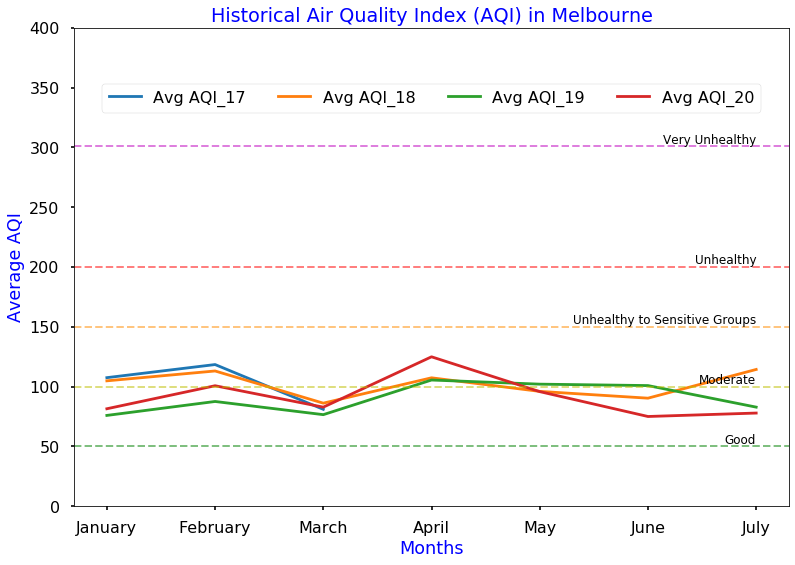

In [60]:
# Plotting the Average AQI for January - July from 2017,2018, 2019
plt.style.use('seaborn-poster')
melbourne_monthly_data_df.plot(y=["Avg AQI_17","Avg AQI_18","Avg AQI_19","Avg AQI_20"])
plt.title("Average AQI", color="blue")
plt.xlabel("Months",color="blue")
plt.ylabel("AQI",color="blue")
plt.xticks(np.arange(7),("January","February","March","April","May","June","July"))


plt.axhline(y=301,color='m', alpha=.5, linestyle='--', lw=2)
plt.text(6,301,'Very Unhealthy', ha='right', va='bottom', fontsize=12)
plt.axhline(y=200,color='r', alpha=.5, linestyle='--', lw=2)
plt.text(6,200,'Unhealthy', ha='right', va='bottom', fontsize=12)
plt.axhline(y=150,color='darkorange', alpha=.5, linestyle='--', lw=2)
plt.text(6,150,'Unhealthy to Sensitive Groups', ha='right', va='bottom', fontsize=12)
plt.axhline(y=100,color='y', alpha=.5, linestyle='--', lw=2)
plt.text(6,100,'Moderate', ha='right', va='bottom', fontsize=12)
plt.axhline(y=50,color='g', alpha=.5, linestyle='--', lw=2)
plt.text(6,50,'Good', ha='right', va='bottom', fontsize=12)
plt.ylim(0,400)
plt.title("Historical Air Quality Index (AQI) in Melbourne")
plt.legend(loc=9, bbox_to_anchor=(.5,.9),ncol=4)
#plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left')
plt.ylabel("Average AQI")

plt.savefig("output_data/melbourne_plot.png")
plt.show()

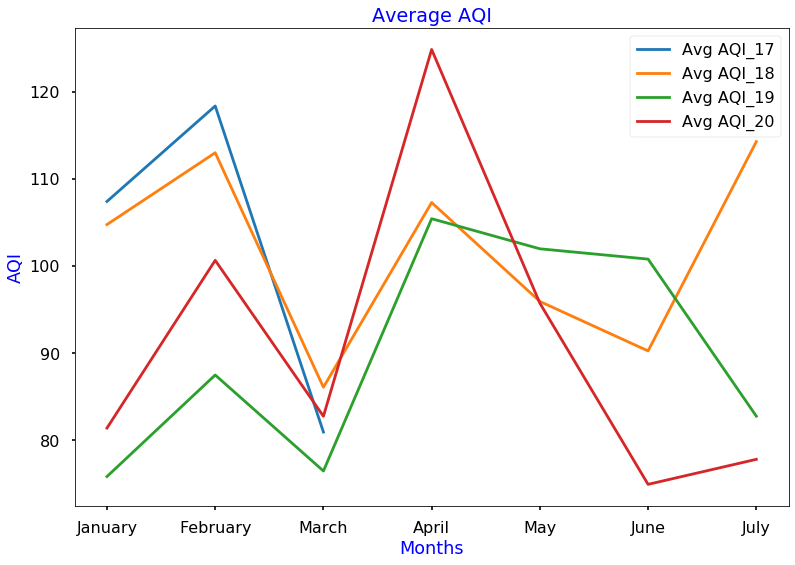

In [61]:
plt.style.use('seaborn-poster')
melbourne_monthly_data_df.plot(y=["Avg AQI_17","Avg AQI_18","Avg AQI_19","Avg AQI_20"])
plt.title("Average AQI", color="blue")
plt.xlabel("Months",color="blue")
plt.ylabel("AQI",color="blue")
plt.xticks(np.arange(7),("January","February","March","April","May","June","July"))
plt.savefig("output_data/melbourne_plot2.png")
plt.show()

### Shutdown policy

* Went on lockdown on March 19
* Became covid-19 free end of April/beginning of May and began to very slightly ease lockdown
* Toward end of June, resurgence of cases
* Shut down back in place first of July

* Resurgence in cases is centered in Melbourne with 13 new deaths, 723 new cases. A 36% jump
   (https://www.bbc.com/news/world-australia-53589817)

### Cases

* Case count taken at 2:00 a.m. this morning from Johns Hopkins website
    (https://coronavirus.jhu.edu/map.html)

#### Country

* Deaths: 1,676
* Confirmed Cases: 15,582

#### Melbourne

* Deaths: 92
* Confirmed: 9,998